In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [9]:
# NLTK libraries for text classification
import sys
sys.path.append('/home/013767416/.local/lib/python2.7/site-packages')

import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('crubadan')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/013767416/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/013767416/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/013767416/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package crubadan to
[nltk_data]     /home/013767416/nltk_data...
[nltk_data]   Package crubadan is already up-to-date!
[nltk_data] Downloading package punkt to /home/013767416/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/013767416/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load the preprocessed dataset 
epinion_data = pd.read_csv('../epinion_processed_final.csv')
epinion_data.head(3)

,item,paid,review,stars,time,user,cleaned_review,polarity,sentiment,textblob_polarity,textblob_sentiment
0,pr-Sony_KV_36FS12__Standard_Televisions,1199,well when i graduated from college it didnt ta...,5,1012262400,pyros7,well graduate college didnt take long realize ...,0.8090,5,0.312500,4
1,Minolta_QMS_PagePro_1250E_Printers,260,i got this printer from minolta as a warranty ...,4,1027296000,fgb59h,get printer minolta warranty replacement minol...,-0.0987,3,0.270833,4
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1800,although i love my vaio especially the gorgeou...,2,1201305600,bucho_ky,although love vaio especially gorgeous display...,0.8883,5,0.240000,4


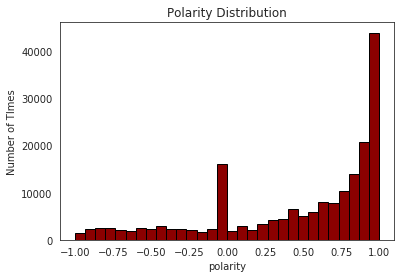

In [5]:
#Polarity Distribution
plt.hist(epinion_data['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
plt.title('Polarity Distribution')
plt.xlabel("polarity")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

/opt/ohpc/pub/apps/python3/3.7.0/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


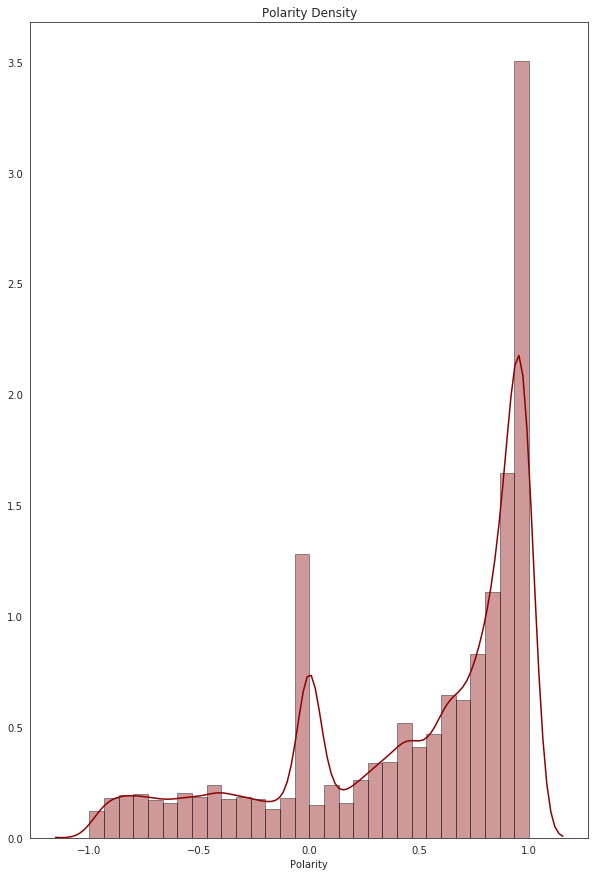

In [34]:
sns.distplot(epinion_data['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Polarity Density')

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

In [36]:
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (epinion_data.cleaned_review
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)
print(words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
from collections import Counter

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt

,Frequency
Word,
car,179569
get,129902
one,105079
use,94616
like,82195
well,80745
go,73498
year,72902
would,71234


In [40]:
stopwords = nltk.corpus.stopwords.words('english')

RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (epinion_data.cleaned_review
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)


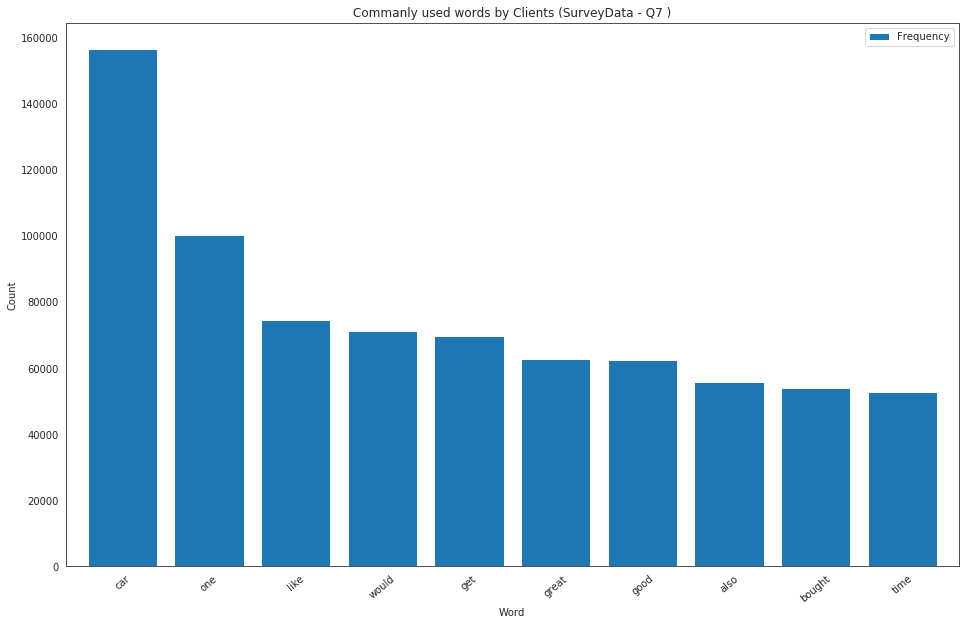

In [26]:
rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100),
                    columns=['Word', 'Frequency'])
#BAR CHART
rslt.plot.bar(rot=40, figsize=(16,10), width=0.8,colormap='tab10')
plt.title("Commanly used words by Clients (SurveyData - Q7 )")
plt.ylabel("Count")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15


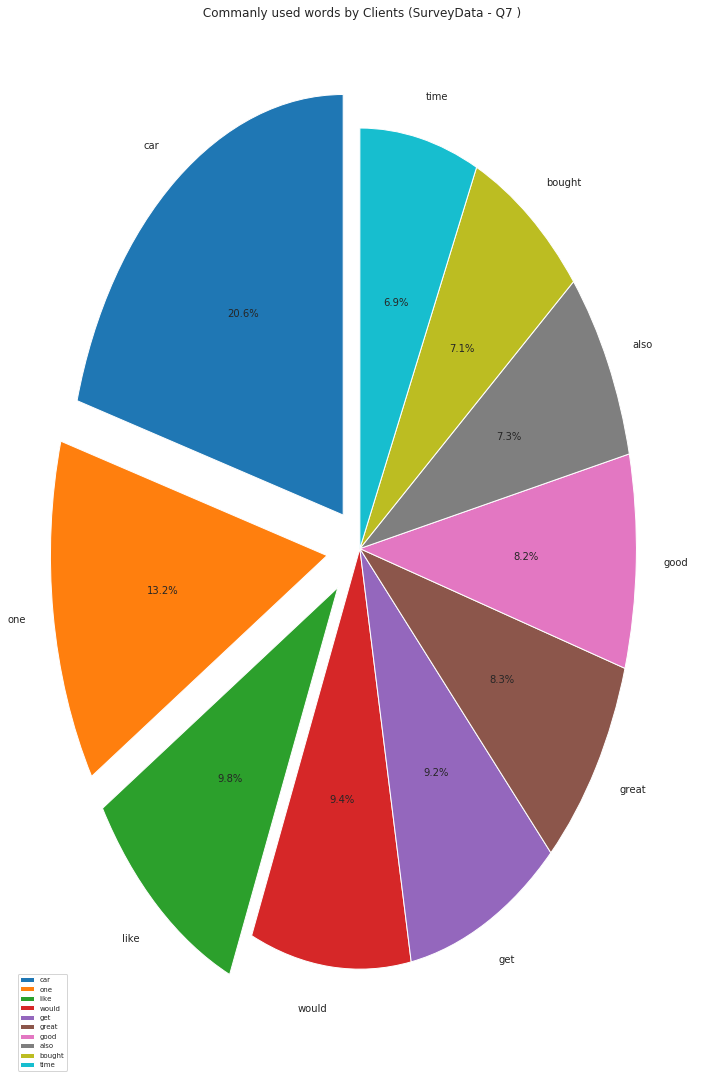

In [23]:
#PIE CHART

explode = (0.1, 0.12, 0.122, 0,0,0,0,0,0,0)  # explode 1st slice
labels=['car',
        'one',
        'like',
        'would',
        'get',
        'great',
        'good',
        'also',
        'bought',
        'time',]

plt.pie(rslt['Frequency'], explode=explode,labels =labels , autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.legend( labels, loc='lower left',fontsize='x-small',markerfirst = True)
plt.tight_layout()
plt.title(' Commanly used words by Clients (SurveyData - Q7 )')
plt.show()

import matplotlib as mpl
mpl.rcParams['font.size'] = 10

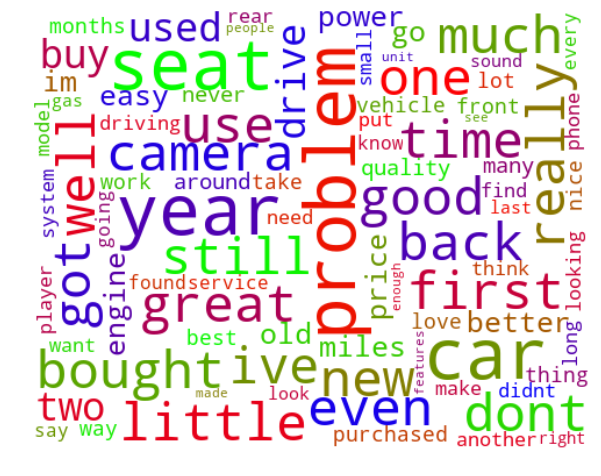

<Figure size 720x720 with 0 Axes>

In [24]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="brg",
                      background_color="white").generate(' '.join(rslt_wordcloud['Word']))
                      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()

After considering the Polarity distribution and density shape the data, Frequently used words and WordCloud
We can say that:
- overall polarity demonstrates a positive value.

https://towardsdatascience.com/statistical-sentiment-analysis-for-survey-data-using-python-9c824ef0c9b0